# PRACTICAL NO: 7

## Name: Urvashi Bisen
## Batch: B2
## Roll No: 20

In [ ]:
pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('/content/Iris.csv')
# Extract features, excluding the 'Species' column
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values # Select only numerical features for clustering

# Define no of clusters(k)
k = 3
def k_medoids(X, k, max_iter=300):
    """Simple K-Medoids clustering implementation."""
    # Randomly initialize medoids
    np.random.seed(42)
    medoid_indices = np.random.choice(len(X), k, replace=False)
    medoids = X[medoid_indices]
    for _ in range(max_iter):
        # Assign each point to the nearest medoid
        distances = np.linalg.norm(X[:, np.newaxis] - medoids, axis=2)
        labels = np.argmin(distances, axis=1)
        # Update medoids
        new_medoids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(medoids == new_medoids):
            break  # Stop if medoids don't change
        medoids = new_medoids
    return labels, medoids
def run_kmeans(X, k):
    """Run K-Means clustering and return results."""
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    end_time = time.time()
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X, kmeans_labels)
    return inertia, silhouette, end_time - start_time, kmeans_labels, kmeans.cluster_centers_
def run_kmedoids(X, k):
    """Run K-Medoids clustering and return results."""
    start_time = time.time()
    labels, medoids = k_medoids(X, k)
    end_time = time.time()
    silhouette = silhouette_score(X, labels)
    return silhouette, end_time - start_time, labels, medoids

In [ ]:
# Run K-Means and K-Medoids
kmeans_inertia, kmeans_silhouette, kmeans_time, kmeans_labels, kmeans_centers = run_kmeans(X, k)
kmedoids_silhouette, kmedoids_time, kmedoids_labels, medoids = run_kmedoids(X, k)

In [ ]:
# Print results
print("K-Means Inertia:", kmeans_inertia)
print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Time:", kmeans_time)
print("K-Medoids Silhouette Score:", kmedoids_silhouette)
print("K-Medoids Time:", kmedoids_time)

K-Means Inertia: 78.94506582597728
K-Means Silhouette Score: 0.5509643746707443
K-Means Time: 0.14569497108459473
K-Medoids Silhouette Score: 0.5525919445499757
K-Medoids Time: 0.002979278564453125


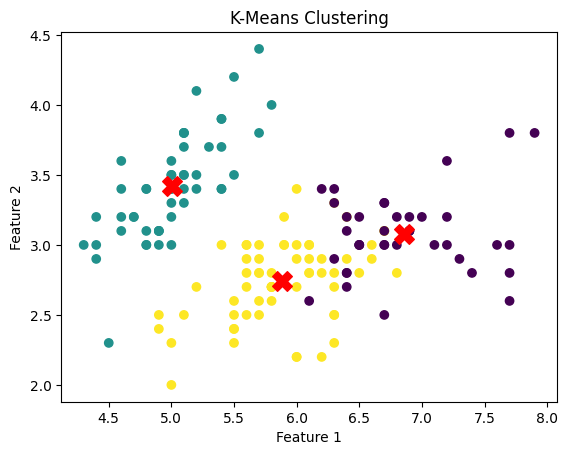

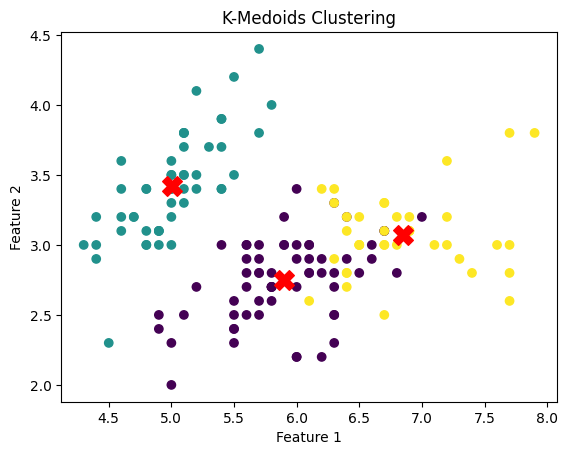

In [ ]:
# Optional: Visualize the clusters (K-Means)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Optional: Visualize the clusters (K-Medoids)
plt.scatter(X[:, 0], X[:, 1], c=kmedoids_labels, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], s=200, c='red', marker='X')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**CONCLUSION**


K-Means and K-Medoids both formed effective clusters with similar Silhouette Scores. K-Means was faster but less robust to outliers, while K-Medoids ensured better handling of outliers by using actual data points as centers. The choice between the two depends on the dataset’s size and sensitivity to noise.